<a href="https://colab.research.google.com/github/ILMNX/machine-learning/blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##library


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

##Dataset

In [ ]:
#buat data tabular seperti dibawah ini
df = pd.DataFrame({
    "ID Buah": pd.Series([1,2,3,4,5]),
    "Diameter": pd.Series([7.0,7.1,6.5,6.6,6.8]),
    "Berat" : pd.Series([165,170,180,195,200]),

})

In [ ]:
df

,ID Buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


##Algoritma K-Means

In [ ]:
#pemilihan feature
df_train = df.drop("ID Buah", axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
#fitting/modeling berdasarkan jumlah kluster (n=2)
n = 2
kmeans_model = KMeans(n_clusters=n, n_init=1,random_state=100).fit(df_train)

In [ ]:
#pelabelan cluster
df["kluster"]=kmeans_model.labels_
df

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,1
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
#hasil dari update centroid
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


##Pemilihan Centroid awal
* Menggunakan pengaturan yang ada di sklearn

In [ ]:
#n_cluster merupakan parameter dari jumlah cluster kelompok yang harus ditentukan
#nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow,dll,defaultnya 8 atau ketika tidak diisi jumlah cluster = 8
#n_init merupakan parameter untuk menentukan brp kali algoritma k-means dijalankan dengan centroid seed yang berbeda
#random_state merupakan parameter untuk menentukan angka acak sebagai inisialisasi centroid
#nilai random_state diisi dengan nilai deterministik(0-100),defaultnya none)

#atur parameter untuk kmeans_model_2 ini sehingga berbeda dengan parameter kmeans_mode sebelumnya
kmeans_model_2 = KMeans(n_clusters=2,n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"]=kmeans_model_2.labels_
df2

,ID Buah,Diameter,Berat,kluster
0,1,7.0,165,1
1,2,7.1,170,1
2,3,6.5,180,1
3,4,6.6,195,0
4,5,6.8,200,0


##Pemilihan jumlah kluster
* menggunakan metode elbow

In [ ]:
#standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

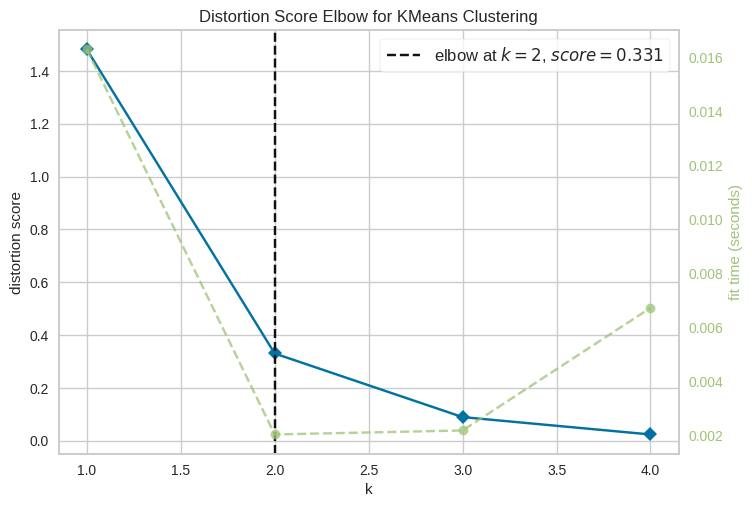

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km= KMeans(n_init = 1, random_state=100)
visualizer = KElbowVisualizer(km, k=(1,5),timings=True)
visualizer.fit(x_scaled)
visualizer.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv')
df

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
...,...,...,...,...,...,...,...,...
367,2022041468,91,NaN,31.0,52.0,31.0,46,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass
